<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Analysis_of_The_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id='1SYSewsuYmg4MeiRPaPMz_CxgBc6BB5gq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MoviesData.csv')  
movies_data = pd.read_csv('MoviesData.csv',engine='python',index_col=0)
movies_data.head()

,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,revenue,production_countries,status,popularity,vote_average,vote_count,movieId,imdbId,cast,director,mean_rating
0,211672,Minions,2015,Wednesday,Family|Animation|Adventure|Comedy,English,91.0,"Minions Stuart, Kevin and Bob are recruited by...",Universal Pictures|Illumination Entertainment,74000000,1.156731e+09,United States of America,Released,547.488298,6.4,4729.0,135887,2293640,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda,3.135554
1,297762,Wonder Woman,2017,Tuesday,Action|Adventure|Fantasy,English,141.0,An Amazon princess comes to the world of Man t...,Dune Entertainment|Atlas Entertainment|Warner ...,149000000,8.205804e+08,United States of America,Released,294.337037,7.2,5025.0,143355,451279,Gal Gadot|Chris Pine|Robin Wright|Danny Huston...,Patty Jenkins,3.747344
2,321612,Beauty and the Beast,2017,Thursday,Family|Fantasy|Romance,English,129.0,A live-action adaptation of Disney's version o...,Walt Disney Pictures|Mandeville Films,160000000,1.262886e+09,United Kingdom|United States of America,Released,287.253654,6.8,5530.0,168366,2771200,Emma Watson|Dan Stevens|Luke Evans|Kevin Kline...,Bill Condon,3.585165
3,339403,Baby Driver,2017,Wednesday,Action|Crime,English,113.0,After being coerced into working for a crime b...,Big Talk Productions|TriStar Pictures|Media Ri...,34000000,2.245113e+08,United Kingdom|United States of America,Released,228.032744,7.2,2083.0,171763,3890160,Ansel Elgort|Lily James|Kevin Spacey|Jamie Fox...,Edgar Wright,3.973244
4,177572,Big Hero 6,2014,Friday,Adventure|Family|Animation|Action|Comedy,English,102.0,The special bond that develops between plus-si...,Walt Disney Pictures|Walt Disney Animation Stu...,165000000,6.521054e+08,United States of America,Released,213.849907,7.8,6289.0,115617,2245084,Scott Adsit|Ryan Potter|Daniel Henney|T.J. Mil...,Chris Williams,3.916242


In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44941 entries, 0 to 44940
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                44941 non-null  int64  
 1   title                 44941 non-null  object 
 2   release_year          44941 non-null  object 
 3   release_day           44941 non-null  object 
 4   genres                42557 non-null  object 
 5   original_language     44816 non-null  object 
 6   runtime               44941 non-null  float64
 7   content               44010 non-null  object 
 8   production_companies  33204 non-null  object 
 9   budget                44941 non-null  int64  
 10  revenue               44941 non-null  float64
 11  production_countries  38760 non-null  object 
 12  status                44941 non-null  object 
 13  popularity            44941 non-null  float64
 14  vote_average          44941 non-null  float64
 15  vote_count         

In [5]:
movies_data=movies_data.replace(np.nan,'Unknown',regex=True)

In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44941 entries, 0 to 44940
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                44941 non-null  int64  
 1   title                 44941 non-null  object 
 2   release_year          44941 non-null  object 
 3   release_day           44941 non-null  object 
 4   genres                44941 non-null  object 
 5   original_language     44941 non-null  object 
 6   runtime               44941 non-null  float64
 7   content               44941 non-null  object 
 8   production_companies  44941 non-null  object 
 9   budget                44941 non-null  int64  
 10  revenue               44941 non-null  float64
 11  production_countries  44941 non-null  object 
 12  status                44941 non-null  object 
 13  popularity            44941 non-null  float64
 14  vote_average          44941 non-null  float64
 15  vote_count         

In [7]:
def count_types(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column].str.split('|'):
    for item in types: 
      type_count[item] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences





In [8]:
genre_set = set()
for genre in movies_data['genres'].str.split('|').values:
  genre_set = genre_set.union(set(genre))
type_occurences= count_types(movies_data, 'genres', genre_set)
type_occurences


[['Drama', 20130],
 ['Comedy', 12961],
 ['Thriller', 7616],
 ['Romance', 6649],
 ['Action', 6542],
 ['Horror', 4645],
 ['Crime', 4279],
 ['Documentary', 3910],
 ['Adventure', 3481],
 ['Science Fiction', 3056],
 ['Family', 2771],
 ['Mystery', 2467],
 ['Unknown', 2384],
 ['Fantasy', 2327],
 ['Animation', 1959],
 ['Foreign', 1629],
 ['Music', 1552],
 ['History', 1388],
 ['War', 1309],
 ['Western', 988],
 ['TV Movie', 758]]

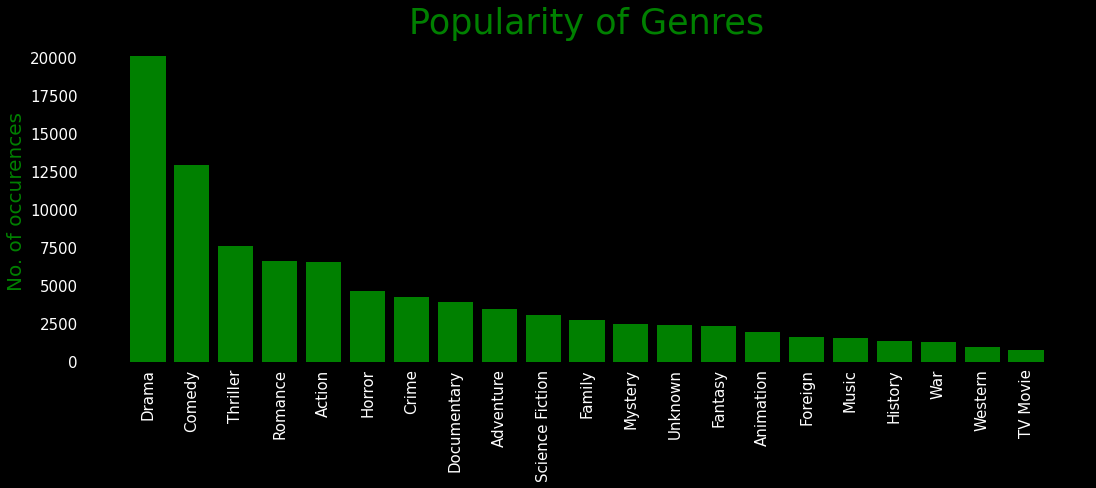

In [10]:
fig = plt.figure(1, figsize=(18,13),facecolor='k')
genre_plot = fig.add_subplot(2,1,2)
genre_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in type_occurences]
x_axis = [k for k,i in enumerate(type_occurences)]
x_label = [i[0] for i in type_occurences]
plt.xticks(color='w',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='w')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
genre_plot.bar(x_axis, y_axis, color='g')
plt.title("Popularity of Genres",color='g',fontsize = 35)
plt.show()

In [12]:
PH_set = set()
for PH in movies_data['production_companies'].str.split('|').values:
  PH_set = PH_set.union(set(PH))
type_occurences= count_types(movies_data, 'production_companies', PH_set)
type_occurences


[['Unknown', 11737],
 ['Warner Bros.', 1195],
 ['Metro-Goldwyn-Mayer (MGM)', 1023],
 ['Paramount Pictures', 997],
 ['Universal Pictures', 828],
 ['Twentieth Century Fox Film Corporation', 820],
 ['Canal+', 449],
 ['Columbia Pictures Corporation', 431],
 ['Columbia Pictures', 428],
 ['New Line Cinema', 277],
 ['United Artists', 276],
 ['RKO Radio Pictures', 273],
 ['Walt Disney Pictures', 263],
 ['Touchstone Pictures', 225],
 ['TriStar Pictures', 197],
 ['Miramax Films', 189],
 ['Mosfilm', 188],
 ['France 2 Cinéma', 174],
 ['Centre National de la Cinématographie (CNC)', 169],
 ['Toho Company', 147],
 ['BBC Films', 130],
 ['Gaumont', 126],
 ['StudioCanal', 122],
 ['Relativity Media', 119],
 ['British Broadcasting Corporation (BBC)', 118],
 ['TF1 Films Production', 115],
 ['Walt Disney Productions', 114],
 ['Orion Pictures', 111],
 ['Regency Enterprises', 106],
 ['Village Roadshow Pictures', 106],
 ['Lionsgate', 98],
 ['Universal International Pictures (UI)', 97],
 ['Zweites Deutsches Fer

In [ ]:
fig = plt.figure(1, figsize=(18,13),facecolor='k')
PH_plot = fig.add_subplot(2,1,2)
PH_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in type_occurences]
x_axis = [k for k,i in enumerate(type_occurences)]
x_label = [i[0] for i in type_occurences]
plt.xticks(color='w',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='w')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
PH_plot.bar(x_axis, y_axis, color='g')
plt.title("Popularity of Genres",color='g',fontsize = 35)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54589 missing from current font.
  font.set_text